In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pickle
import sys

sys.path.append("../lib") # add code library to paths

# add lib to path 
from visualize import *



In [3]:
netname = 'recurrent_nn'
stimname = 'bar_0.8'
sigB = np.load(f'../output/{netname}/{stimname}/BC_grid_{stimname}.npy')
sigA = np.load(f'../output/{netname}/{stimname}/AC_grid_{stimname}.npy')
sigG = np.load(f'../output/{netname}/{stimname}/GC_grid_{stimname}.npy')
stim = np.load(f'../output/{netname}/{stimname}/stim_grid_{stimname}.npy')

output = [stim,sigB,sigA,sigG]
        
with open(f'../output/{netname}/params.pkl', 'rb') as f:
    params = pickle.load(f)


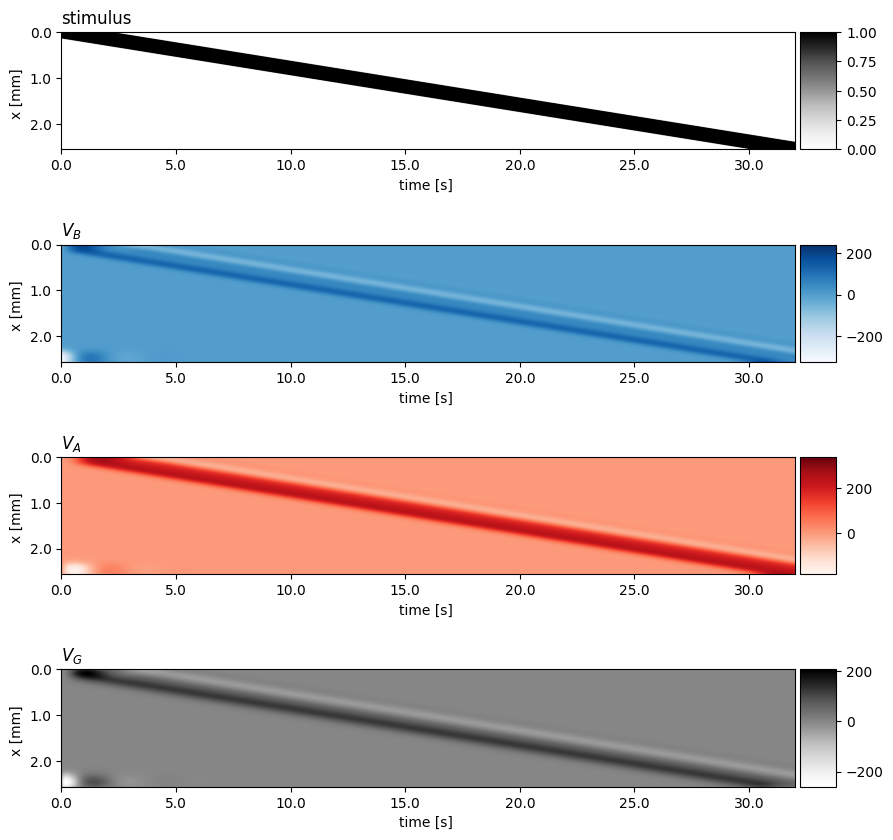

In [4]:
fig = plot_grid(output,params)

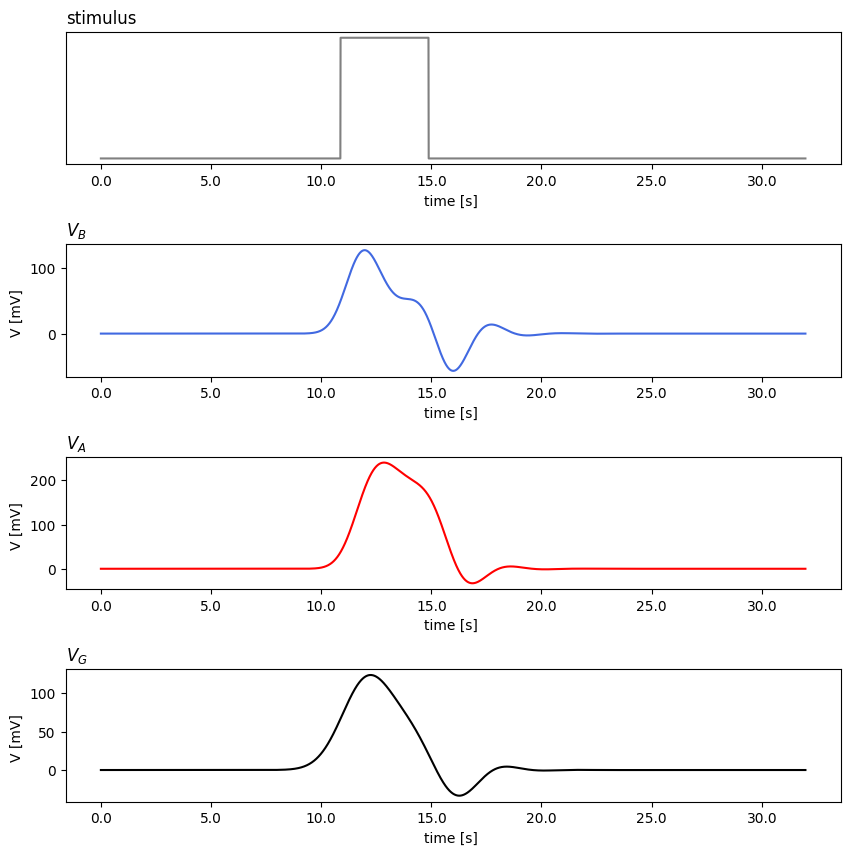

In [5]:
fig = plot_timetrace(output, params)

In [6]:
import numpy as np
import pandas as pd

dt = 0.001
time = np.arange(0,len(sigB[256,:]))*dt

df = pd.DataFrame( np.array([time, sigB[256,:]]).T) 
df


,0,1
0,0.000,0.000000
1,0.001,0.000000
2,0.002,0.000000
3,0.003,0.000000
4,0.004,0.000000
...,...,...
3194,3.194,-0.000417
3195,3.195,-0.000418
3196,3.196,-0.000420
3197,3.197,-0.000421


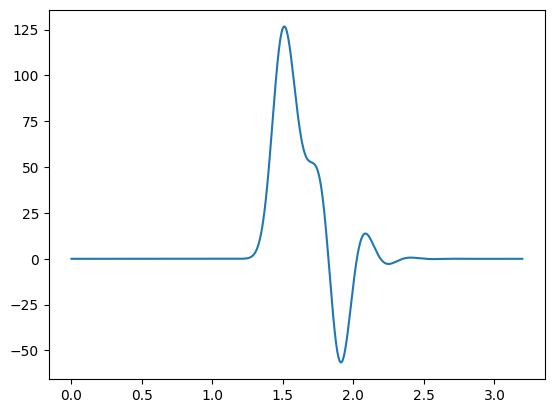

In [7]:
plt.plot(df[0], df[1])

In [8]:
df.to_csv('data.txt', sep=' ', index=False)

In [9]:
# plot speedscalig 

# load resp diff speed

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load df
stimname = 'bar'
df = pd.read_csv(f'../output/{netname}/grid_bar_peakshift.csv')

In [22]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,BC206,wBA,tauA,speed,t_bar,t_max_G,t_shift_G,ant_G,v_max_G,t_max_B,t_shift_B,ant_B,v_max_B,pref_v_G,pref_v_B
0,0,0,0,[ 0.00000000e+000 0.00000000e+000 0.00000000...,1.0,0.020,0.1,10.3,NaN,NaN,NaN,NaN,7.18,3.12,0.312,2.242342e-125,NaN,0.1
1,1,1,1,[ 0.00000000e+000 0.00000000e+000 0.00000000...,1.0,0.021,0.1,10.3,NaN,NaN,NaN,NaN,7.24,3.06,0.306,5.296881e-124,NaN,0.1
2,2,2,2,[ 0.00000000e+000 0.00000000e+000 0.00000000...,1.0,0.022,0.1,10.3,NaN,NaN,NaN,NaN,7.29,3.01,0.301,1.074866e-122,NaN,0.1
3,3,3,3,[ 0.00000000e+000 0.00000000e+000 0.00000000...,1.0,0.023,0.1,10.3,NaN,NaN,NaN,NaN,7.34,2.96,0.296,1.899145e-121,NaN,0.1
4,4,4,4,[ 0.00000000e+000 0.00000000e+000 0.00000000...,1.0,0.024,0.1,10.3,NaN,NaN,NaN,NaN,7.39,2.91,0.291,2.956353e-120,NaN,0.1


In [23]:
type(df['BC206'].loc[0])

str

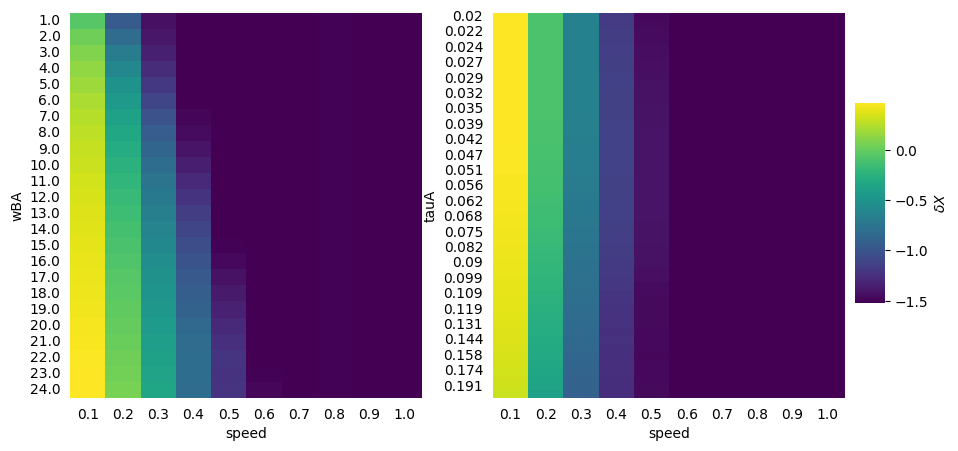

In [24]:
fig = plt.figure(figsize = (10,5))
gs= fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])

# plot heatmap for wBA
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# fix one tau 
df[df['tauA'] == 0.09]
heatmap = df.pivot_table(index = 'wBA',columns = 'speed',values = 'ant_B', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax1,  cbar_ax=cbar_ax,cbar_kws={'label': r'$V_{B}*$ [mV]'})
ax1.tick_params(left=False, bottom=False)

ax2 = fig.add_subplot(gs[0,1])
df[df['wBA'] == 10.0]
heatmap = df.pivot_table(index = 'tauA',columns = 'speed',values = 'ant_B', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax2,  cbar_ax=cbar_ax,cbar_kws={'label': r'$\delta X$'})
ax2.tick_params(left=False, bottom=False)


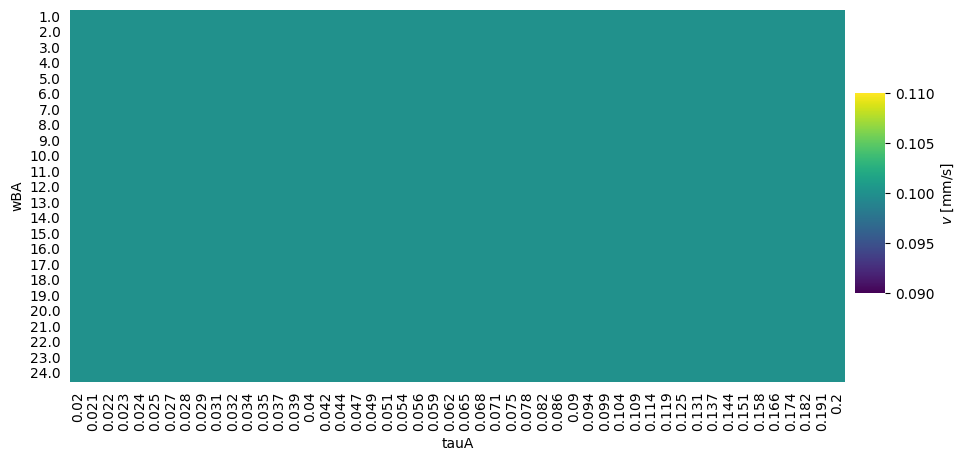

In [28]:
fig = plt.figure(figsize = (10,5))
gs= fig.add_gridspec(1,1)
ax1 = fig.add_subplot(gs[0,0])

# plot heatmap for wBA
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# fix one tau 
df[df['tauA'] == 0.09]
heatmap = df.pivot_table(index = 'wBA',columns = 'tauA',values = 'pref_v_B', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax1,  cbar_ax=cbar_ax,cbar_kws={'label': r'$v$ [mm/s]'})
ax1.set_aspect('equal', adjustable='box')  # Make the matrix square
ax1.tick_params(left=False, bottom=False)


(array([7636.,  471.,  442.,  484.,  379.,  557.,  344.,  577.,  287.,
         823.]),
 array([-1.526, -1.313, -1.1  , -0.887, -0.674, -0.461, -0.248, -0.035,
         0.178,  0.391,  0.604]),
 <BarContainer object of 10 artists>)

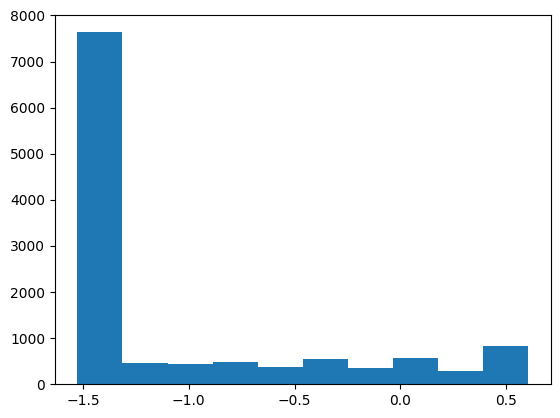

In [29]:
plt.hist(df['ant_B'])

(array([    0.,     0.,     0.,     0.,     0., 12000.,     0.,     0.,
            0.,     0.]),
 array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 10 artists>)

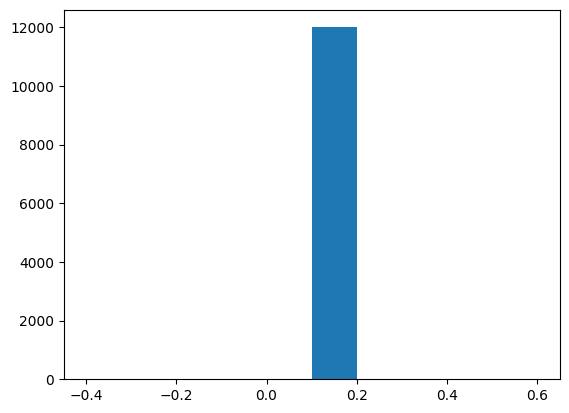

In [30]:
plt.hist(df['pref_v_B'])